In [223]:
using DifferentialEquations
using ModelingToolkit
using Plots
using LinearAlgebra
Plots.gr(lw=2)

Plots.GRBackend()

In [224]:
@parameters k_1 k_2 k_3 v k_4 k_5 n k v
@variables t s_1(t) s_2(t)
D = Differential(t)

(::Differential) (generic function with 2 methods)

In [225]:
eqs = [ D(s_1) ~ v + k_5*s_2 - k_3*s_1 ,
        D(s_2) ~ k_2/(1 + (s_1/k)^n) - k_4*s_2 - k_5*s_2]
@named sys = ODESystem(eqs)

Model sys with 2 equations
States (2):
  s_1(t)
  s_2(t)
Parameters (7):
  k_5
  v
  k_3
  k_2
  k_4
  n
⋮

In [226]:
params = Dict(k_1=>1.0, k_2=>1.0, k_3=>1.0, k_4=>1.0,k_5 => 1.0,n => 1.0 ,v => 1.0,k=>1.0)

u0s = (Dict(s_1=>0.1, s_2=>0.1), 
       Dict(s_1=>0.2, s_2=>0.3),
       Dict(s_1=>0.3, s_2=>0.2),
       Dict(s_1=>0.25, s_2=>1.9),
       Dict(s_1=>1.85, s_2=>2.70),
        Dict(s_1=>1.9, s_2=>2.80))

tend = 10

10

In [227]:
sols = map(u0s) do u0
    prob = ODEProblem(sys, u0, tend, params)
    sol = solve(prob)
end;

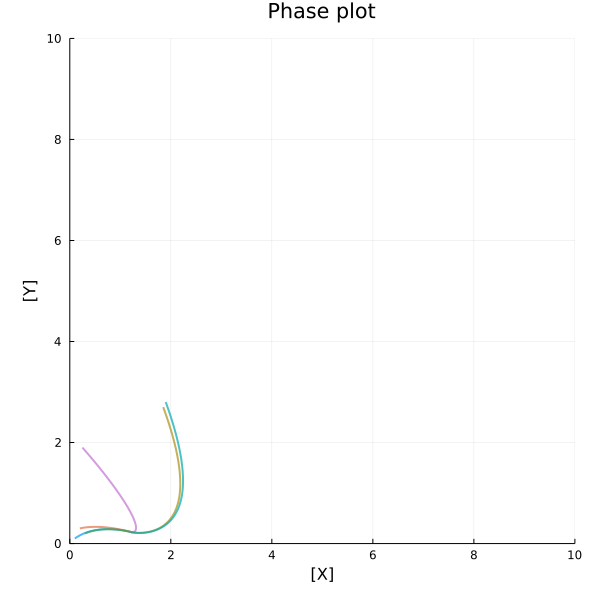

In [228]:
p4 = plot()
for sol in sols
    plot!(p4, sol, vars=(1, 2), linealpha=0.7, legend = nothing)
end
plot!(p4, aspect_ratio=:equal, title="Phase plot", xlabel="[X]", ylabel="[Y]", ylims=(0.0, 10.0), xlims=(0.0, 10.0), size=(600, 600))

In [229]:
# Nullclines

nullcline_s_1(s_1) = (params[v] + params[k_5] * s_2)/params[k_3]
nullcline_s_2(s_1) = params[k_2] / (params[k_4]+params[k_5])/(1 + s_1/params[k])^params[n]

nullcline_s_2 (generic function with 1 method)

In [230]:
rhs = [x.rhs for x in collect(eqs)]

2-element Vector{SymbolicUtils.Add{Real, Int64, Dict{Any, Number}, Nothing}}:
 v + k_5*s_2(t) - k_3*s_1(t)
 k_2 / (1 + (s_1(t) / k)^n) - k_4*s_2(t) - k_5*s_2(t)

In [231]:
oop, iip = eval.(ModelingToolkit.build_function(rhs, [A, B], [k_1, k_2, k_3, k_4, k_5, n], t))

(var"#72#73"(), var"#74#75"())

In [232]:
oop([0, 0], [20, 5, 5, 5, 2, 4], 0.0)

LoadError: Sym s_2(t) is not callable. Use @syms s_2(t)(var1, var2,...) to create it as a callable.

In [235]:
# Figure 4.5A
p45a = plot(aspect_ratio=:equal, title="Fig. 4.5A, Phase plot with nullclines")

# Phase plots
for sol in sols
    plot!(p45a, sol, vars=(1, 2), linealpha=0.7, lab=nothing)
end

# Parametric plotting for nullcline
plot!(p45a, nullcline_s_1, identity, 0.0, 2.0, label="A nullcline", line=(:black, :dot))
plot!(p45a, nullcline_s_2, identity, 0.0, 2.0, label="B nullcline", line=(:black, :dash))
plot!(p45a, xlim=(0.0, 2.0), ylim=(0.0, 2.0), legend=:bottomright, size=(600, 600), xlabel="[A]", ylabel="[B]")

LoadError: MethodError: no method matching decompose(::Num)
[0mClosest candidates are:
[0m  decompose([91m::Integer[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/float.jl:642
[0m  decompose([91m::Rational[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/rational.jl:515
[0m  decompose([91m::FixedPointNumbers.Normed[39m) at ~/.julia/packages/FixedPointNumbers/HAGk2/src/normed.jl:296
[0m  ...

In [234]:
network_shape = [(1, size(X_train[1], 1), :identity , 0)]

num_params = sum([i * o + i * b for (o, i, _, b) in network_shape]) 

LoadError: UndefVarError: X_train not defined

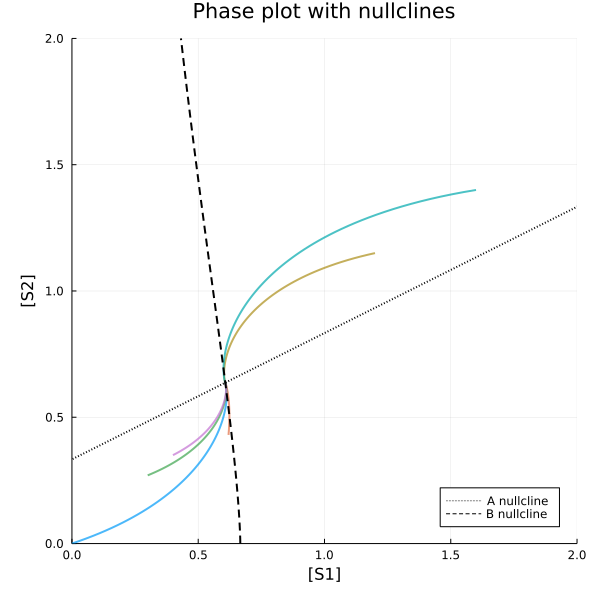

In [252]:
using DifferentialEquations
using ModelingToolkit
using Plots
using LinearAlgebra
Plots.gr(lw=2)


@parameters V k k_2 k_3 k_4 k_5 n
@variables t S1(t) S2(t)
D = Differential(t)

eqs = [ D(S1) ~ V + k_5 * S2 - k_3 * S1,
        D(S2) ~ k_2 / (1 + (S1/k)^n) - k_4 * S2 - k_5 * S2]
@named sys = ODESystem(eqs)

params = Dict(V=>1.0, k=>3.0, k_2=>3.0, k_3=>3.0, k_4=>3.0,k_5=>1.5, n=>1.5)

u0s = (Dict(S1=>0.0, S2=>0.0), 
       Dict(S1=>0.43, S2=>0.62),
       Dict(S1=>0.27, S2=>0.3),
       Dict(S1=>0.35, S2=>0.4),
       Dict(S1=>1.15, S2=>1.20),
Dict(S1=>1.4, S2=>1.6))

tend = 10

sols = map(u0s) do u0
    prob = ODEProblem(sys, u0, tend, params)
    sol = solve(prob)
end;

# Nullclines

nullcline_a(S1) = (params[k_3]*S1 - params[V]) / params[k_5]
nullcline_b(S1) = params[k_2] / ((params[k_4] + params[k_5])*(1 + (S1/ params[k])^params[n]))

rhs = [x.rhs for x in collect(eqs)]

oop, iip = eval.(ModelingToolkit.build_function(rhs, [S1, S2], [V, k, k_2, k_3, k_4, k_5, n], t))

oop([0, 0], [1, 1, 1, 1, 1, 1,1 ], 0.0)

# Figure 4.5A
p45a = plot(aspect_ratio=:equal, title="Phase plot with nullclines")

# Phase plots
for sol in sols
    plot!(p45a, sol, vars=(2, 1), linealpha=0.7, lab=nothing)
end

# Parametric plotting for nullcline
plot!(p45a, nullcline_a, identity, 0.0, 2.0, label="A nullcline", line=(:black, :dot))
plot!(p45a, nullcline_b, identity, 0.0, 2.0, label="B nullcline", line=(:black, :dash))
plot!(p45a, xlim=(0.0, 2.0), ylim=(0.0, 2.0), legend=:bottomright, size=(600, 600), xlabel="[S1]", ylabel="[S2]")